In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [79]:
train = pd.read_csv('/content/drive/My Drive/train_data.csv')
test = pd.read_csv('/content/drive/My Drive/test_data.csv')
title_brand = pd.read_csv('/content/drive/My Drive/title_brand.csv')

/tmp/ipython-input-499614521.py:1: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  train = pd.read_csv('/content/drive/My Drive/train_data.csv')


In [80]:
train['vote'] = pd.to_numeric(train['vote'], errors='coerce').fillna(0)

In [81]:
agg_df = train.groupby('reviewerID').agg(
    total_votes     = ('vote', 'sum'),
    reviewerName    = ('reviewerName', 'first')
).reset_index()

In [82]:
top_10 = agg_df.nlargest(10, 'total_votes')

In [83]:
top_10

,reviewerID,total_votes,reviewerName
97732,A25GROL6KJV3QG,4572.0,Benson Leung
128674,A2IK776FY6MEMG,1608.0,Obi Wan
23990,A1A39899KH5QCI,1352.0,Chris Winter
290448,AMYCUX8EWEUVV,1342.0,Mayra S.
258841,A9K7V1MKJ9BOJ,1337.0,VermontGuy
72492,A1UQUDT2Q0YENM,1230.0,Michael
233341,A3R1WFO4KIUQXZ,1209.0,PhotoGraphics
167971,A2Z9APP5B09MFY,1188.0,Nicholas
293848,AOEAD7DPLZE53,1103.0,NLee the Engineer
320458,AZPCDY9OQ605E,1045.0,David H


In [84]:
train['text_len'] = train['reviewText'].astype(str).str.len()

Index(['overall', 'vote', 'verified', 'reviewTime', 'reviewerID', 'asin',
       'style', 'reviewerName', 'reviewText', 'summary', 'unixReviewTime'],
      dtype='object')

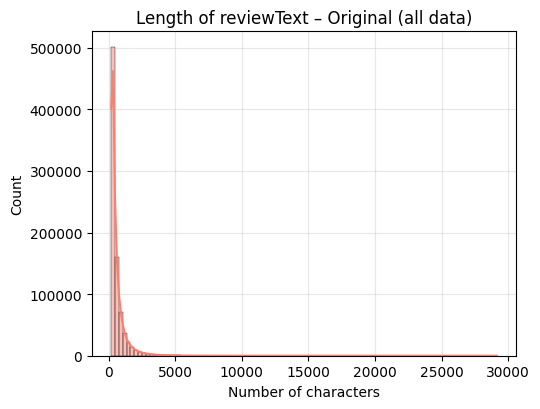

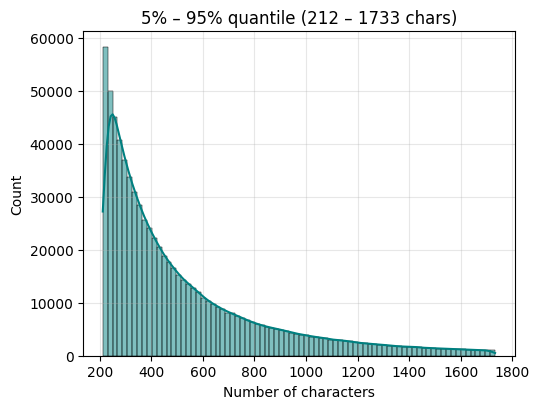

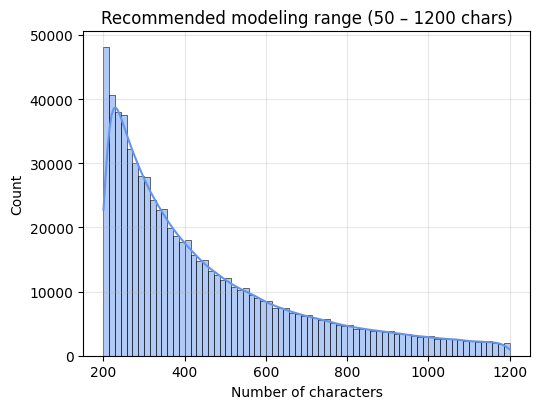

In [92]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming text_len already exists

q05 = train['text_len'].quantile(0.05)
q95 = train['text_len'].quantile(0.95)
MIN_LEN, MAX_LEN = 50, 1200

plt.figure(figsize=(5.5, 4.2))

# ── Original
sns.histplot(
    data=train,
    x='text_len',
    bins=100,
    kde=True,
    color='salmon',
    stat='count'
)
plt.title("Length of reviewText – Original (all data)", fontsize=12)
plt.xlabel("Number of characters")
plt.ylabel("Count")
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# ── 5%–95%
plt.figure(figsize=(5.5, 4.2))
sns.histplot(
    data=train[(train['text_len'] >= q05) & (train['text_len'] <= q95)],
    x='text_len',
    bins=80,
    kde=True,
    color='teal'
)
plt.title(f"5% – 95% quantile ({int(q05)} – {int(q95)} chars)", fontsize=12)
plt.xlabel("Number of characters")
plt.ylabel("Count")
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# ── Recommended range
plt.figure(figsize=(5.5, 4.2))
sns.histplot(
    data=train[(train['text_len'] >= MIN_LEN) & (train['text_len'] <= MAX_LEN)],
    x='text_len',
    bins=70,
    kde=True,
    color='cornflowerblue'
)
plt.title(f"Recommended modeling range ({MIN_LEN} – {MAX_LEN} chars)", fontsize=12)
plt.xlabel("Number of characters")
plt.ylabel("Count")
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()